# <p style="text-align:center;">Supervised Learning</p>

# Required Packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import ensemble

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix


# Target

We use the morphological type class of galaxies as the target variable.

In [15]:
def galaxy_morf(row):
    if row["elliptical"]:
        return "E"
    elif row["spiral"]:
        return "S"
    else:
        return "I"
    
def num_type(row):
    if row["type"] == "I":
        return 1
    elif row["type"] == "S":
        return 2
    else:
        return 3

In [16]:
data = pd.read_csv('curated_galaxies') #usamos el dataset curado en el entregable 2
data.head(10)

Unnamed: 0                  objID          ra        dec  modelMag_u  \
0           0  1,23765119242489E+018  116.519097  39.886407    0.396231   
1           1  1,23765149575578E+018  116.451900  41.421270    0.447561   
2           2  1,23767370611537E+018  115.946713  41.918877    0.511986   
3           3   1,2376737066523E+018  116.051943  42.287231    0.912048   
4           4  1,23765127349266E+018  117.287392  43.434782    0.599886   
5           5  1,23765439217644E+018  118.240207  39.303836    0.657823   
6           6  1,23765119135154E+018  118.113313  40.326451    0.497534   
7           7  1,23765149629429E+018  118.716505  44.919518    0.497433   
8           8  1,23767370557974E+018  119.822479  42.008528    0.339543   
9          10  1,23765127349502E+018  121.497606  47.943964    0.620583   

   modelMag_g  modelMag_r  modelMag_i  modelMag_z  petroR90_r         z  \
0    0.417569    0.448185    0.416475    0.450813    0.309874  0.717351   
1    0.354289    0.326150    0.290167    0.299840    0.365343  0.673681   
2    0.512315    0.535575    0.496362    0.547654    0.434733  0.146169   
3    0.833285    0.862893    0.912903    0.809306    0.013099  0.637896   
4    0.590932    0.599145    0.554972    0.593603    0.486430  0.753031   
5    0.582473    0.543590    0.478001    0.493152    0.131404  0.688396   
6    0.507358    0.543143    0.508868    0.544283    0.299147  0.726213   
7    0.473464    0.485185    0.446871    0.491850    0.506361  0.850384   
8    0.245661    0.217114    0.185941    0.185240    0.731052  0.788147   
9    0.611326    0.625066    0.577036    0.618091    0.431372  0.682376   

      Color  elliptical  spiral  uncertain clase  
0  0.648141           0       1          0     S  
1  0.375909           0       0          1     I  
2  0.620548           0       0          1     I  
3  0.566071           0       0          1     I  
4  0.595081           0       0          1     I  
5  0.420704           0       0          1     I  
6  0.653874           0       0          1     I  
7  0.560302           0       1          0     S  
8  0.357208           1       0          0     E  
9  0.606796           0       0          1     I

In [17]:
# Clases
data["type"] = data.apply(galaxy_morf, axis=1)

In [18]:
# variable Númerica**

data["target"] = data.apply(num_type, axis=1)


display(data.head(10))
display (data.shape)
data.describe()

Unnamed: 0                  objID          ra        dec  modelMag_u  \
0           0  1,23765119242489E+018  116.519097  39.886407    0.396231   
1           1  1,23765149575578E+018  116.451900  41.421270    0.447561   
2           2  1,23767370611537E+018  115.946713  41.918877    0.511986   
3           3   1,2376737066523E+018  116.051943  42.287231    0.912048   
4           4  1,23765127349266E+018  117.287392  43.434782    0.599886   
5           5  1,23765439217644E+018  118.240207  39.303836    0.657823   
6           6  1,23765119135154E+018  118.113313  40.326451    0.497534   
7           7  1,23765149629429E+018  118.716505  44.919518    0.497433   
8           8  1,23767370557974E+018  119.822479  42.008528    0.339543   
9          10  1,23765127349502E+018  121.497606  47.943964    0.620583   

   modelMag_g  modelMag_r  modelMag_i  modelMag_z  petroR90_r         z  \
0    0.417569    0.448185    0.416475    0.450813    0.309874  0.717351   
1    0.354289    0.326150    0.290167    0.299840    0.365343  0.673681   
2    0.512315    0.535575    0.496362    0.547654    0.434733  0.146169   
3    0.833285    0.862893    0.912903    0.809306    0.013099  0.637896   
4    0.590932    0.599145    0.554972    0.593603    0.486430  0.753031   
5    0.582473    0.543590    0.478001    0.493152    0.131404  0.688396   
6    0.507358    0.543143    0.508868    0.544283    0.299147  0.726213   
7    0.473464    0.485185    0.446871    0.491850    0.506361  0.850384   
8    0.245661    0.217114    0.185941    0.185240    0.731052  0.788147   
9    0.611326    0.625066    0.577036    0.618091    0.431372  0.682376   

      Color  elliptical  spiral  uncertain clase type  target  
0  0.648141           0       1          0     S    S       2  
1  0.375909           0       0          1     I    I       1  
2  0.620548           0       0          1     I    I       1  
3  0.566071           0       0          1     I    I       1  
4  0.595081           0       0          1     I    I       1  
5  0.420704           0       0          1     I    I       1  
6  0.653874           0       0          1     I    I       1  
7  0.560302           0       1          0     S    S       2  
8  0.357208           1       0          0     E    E       3  
9  0.606796           0       0          1     I    I       1

(56545, 18)

Unnamed: 0            ra           dec    modelMag_u    modelMag_g  \
count  56545.000000  56545.000000  56545.000000  56545.000000  56545.000000   
mean   41881.743815    183.402710     25.400552      0.482438      0.452570   
std    26118.804710     57.709405     18.622262      0.126569      0.127546   
min        0.000000      0.008745    -11.202394      0.000000      0.000000   
25%    19357.000000    151.364561     10.506527      0.398104      0.365542   
50%    39347.000000    183.904718     23.910305      0.494381      0.472302   
75%    63495.000000    221.679881     39.433792      0.573036      0.554660   
max    92099.000000    359.965567     70.133213      1.000000      1.000000   

         modelMag_r    modelMag_i    modelMag_z    petroR90_r             z  \
count  56545.000000  56545.000000  56545.000000  56545.000000  56545.000000   
mean       0.455663      0.418586      0.445480      0.337935      0.536541   
std        0.131967      0.124335      0.136140      0.174565      0.282370   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.363388      0.330434      0.347292      0.210154      0.303909   
50%        0.477013      0.438235      0.466167      0.305997      0.541897   
75%        0.565233      0.521477      0.557679      0.429129      0.787953   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              Color    elliptical        spiral     uncertain        target  
count  56545.000000  56545.000000  56545.000000  56545.000000  56545.000000  
mean       0.534350      0.073163      0.339782      0.587055      1.486108  
std        0.106292      0.260406      0.473639      0.492368      0.629397  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.441027      0.000000      0.000000      0.000000      1.000000  
50%        0.551587      0.000000      0.000000      1.000000      1.000000  
75%        0.618387      0.000000      1.000000      1.000000      2.000000  
max        1.000000      1.000000      1.000000      1.000000      3.000000

In [19]:
print(data.columns)

Index(['Unnamed: 0', 'objID', 'ra', 'dec', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z', 'Color',
       'elliptical', 'spiral', 'uncertain', 'clase', 'type', 'target'],
      dtype='object')


In [20]:
data.shape, data.objID.nunique()

((56545, 18), 56545)

In [21]:
data_unique.describe()

Unnamed: 0            ra           dec    modelMag_u    modelMag_g  \
count  56545.000000  56545.000000  56545.000000  56545.000000  56545.000000   
mean   41881.743815    183.402710     25.400552      0.482438      0.452570   
std    26118.804710     57.709405     18.622262      0.126569      0.127546   
min        0.000000      0.008745    -11.202394      0.000000      0.000000   
25%    19357.000000    151.364561     10.506527      0.398104      0.365542   
50%    39347.000000    183.904718     23.910305      0.494381      0.472302   
75%    63495.000000    221.679881     39.433792      0.573036      0.554660   
max    92099.000000    359.965567     70.133213      1.000000      1.000000   

         modelMag_r    modelMag_i    modelMag_z    petroR90_r             z  \
count  56545.000000  56545.000000  56545.000000  56545.000000  56545.000000   
mean       0.455663      0.418586      0.445480      0.337935      0.536541   
std        0.131967      0.124335      0.136140      0.174565      0.282370   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.363388      0.330434      0.347292      0.210154      0.303909   
50%        0.477013      0.438235      0.466167      0.305997      0.541897   
75%        0.565233      0.521477      0.557679      0.429129      0.787953   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              Color    elliptical        spiral     uncertain        target  
count  56545.000000  56545.000000  56545.000000  56545.000000  56545.000000  
mean       0.534350      0.073163      0.339782      0.587055      1.486108  
std        0.106292      0.260406      0.473639      0.492368      0.629397  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.441027      0.000000      0.000000      0.000000      1.000000  
50%        0.551587      0.000000      0.000000      1.000000      1.000000  
75%        0.618387      0.000000      1.000000      1.000000      2.000000  
max        1.000000      1.000000      1.000000      1.000000      3.000000

In [23]:
type_cols      = ['ra','dec','objID','elliptical', 'spiral', 'uncertain', 'type']

# escalar
data_rf      = data_unique.drop(type_cols, axis=1)
# data_clus_cols = data_clus.columns
data_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56545 entries, 0 to 56544
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  56545 non-null  int64  
 1   modelMag_u  56545 non-null  float64
 2   modelMag_g  56545 non-null  float64
 3   modelMag_r  56545 non-null  float64
 4   modelMag_i  56545 non-null  float64
 5   modelMag_z  56545 non-null  float64
 6   petroR90_r  56545 non-null  float64
 7   z           56545 non-null  float64
 8   Color       56545 non-null  float64
 9   clase       56545 non-null  object 
 10  target      56545 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 5.2+ MB


In [26]:
# variables = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z', 'Color', 'distancia_L', 'Mag_abs',]
variables = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'Color', 'z']

In [27]:

data_rfs = data_rf[variables].copy()
data_rfs

modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z  petroR90_r  \
0        0.396231    0.417569    0.448185    0.416475    0.450813    0.309874   
1        0.447561    0.354289    0.326150    0.290167    0.299840    0.365343   
2        0.511986    0.512315    0.535575    0.496362    0.547654    0.434733   
3        0.912048    0.833285    0.862893    0.912903    0.809306    0.013099   
4        0.599886    0.590932    0.599145    0.554972    0.593603    0.486430   
...           ...         ...         ...         ...         ...         ...   
56540    0.475818    0.402390    0.379367    0.340634    0.355182    0.377464   
56541    0.438100    0.462221    0.495738    0.467077    0.504362    0.336679   
56542    0.665990    0.556441    0.516213    0.459223    0.473984    0.098610   
56543    0.541477    0.553019    0.578678    0.541279    0.587959    0.162309   
56544    0.562978    0.501464    0.507289    0.470644    0.525004    0.523374   

          Color         z  
0      0.648141  0.717351  
1      0.375909  0.673681  
2      0.620548  0.146169  
3      0.566071  0.637896  
4      0.595081  0.753031  
...         ...       ...  
56540  0.420730  0.308971  
56541  0.663942  0.694151  
56542  0.364519  0.953935  
56543  0.647214  0.562806  
56544  0.500402  0.471480  

[56545 rows x 8 columns]

In [28]:
data_rfs = pd.DataFrame(data_rfs, columns=variables)
data_rfs

modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z  petroR90_r  \
0        0.396231    0.417569    0.448185    0.416475    0.450813    0.309874   
1        0.447561    0.354289    0.326150    0.290167    0.299840    0.365343   
2        0.511986    0.512315    0.535575    0.496362    0.547654    0.434733   
3        0.912048    0.833285    0.862893    0.912903    0.809306    0.013099   
4        0.599886    0.590932    0.599145    0.554972    0.593603    0.486430   
...           ...         ...         ...         ...         ...         ...   
56540    0.475818    0.402390    0.379367    0.340634    0.355182    0.377464   
56541    0.438100    0.462221    0.495738    0.467077    0.504362    0.336679   
56542    0.665990    0.556441    0.516213    0.459223    0.473984    0.098610   
56543    0.541477    0.553019    0.578678    0.541279    0.587959    0.162309   
56544    0.562978    0.501464    0.507289    0.470644    0.525004    0.523374   

          Color         z  
0      0.648141  0.717351  
1      0.375909  0.673681  
2      0.620548  0.146169  
3      0.566071  0.637896  
4      0.595081  0.753031  
...         ...       ...  
56540  0.420730  0.308971  
56541  0.663942  0.694151  
56542  0.364519  0.953935  
56543  0.647214  0.562806  
56544  0.500402  0.471480  

[56545 rows x 8 columns]

# Division into Training and Test Sets
  

Starting from the data in the variables X and y, we proceed to split them into training and testing sets:

In [29]:
y = data_rf['target']
y

0        2
1        1
2        1
3        1
4        1
        ..
56540    3
56541    1
56542    1
56543    1
56544    2
Name: target, Length: 56545, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_rfs, y, train_size=0.8, random_state = 8, stratify = y)

# Radom Forest (RF)

We select the relevant physical variables for the classification of galaxies.

In [31]:

# param_grid = {
# 'n_stimators': [100, 200, 300],
# 'max_depth': [None, 2, 5, 10 ],
# 'min_samples_split': [2, 5, 10],
# 'min_samples_leaf': [1, 2, 4],
# 'max_features': ['sqrt', 'log2'],
# 'class_weight': [None, 'balanced']
# }
# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(x_train, y_train)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 83}


In [33]:
# clf = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 5, n_estimators= 129)
# clf.fit(x_train, y_train);
# clf = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 4, n_estimators= 98)
# clf = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'log2', min_samples_leaf= 8, min_samples_split= 8, n_estimators= 85, class_weight='balanced')
clf = ensemble.RandomForestClassifier(max_depth= 38, max_features= 'log2', min_samples_leaf= 6, min_samples_split= 9, n_estimators= 151, class_weight='balanced')
clf.fit(x_train, y_train);

In [34]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.80      0.71      0.75      6639
           2       0.66      0.69      0.67      3843
           3       0.40      0.68      0.50       827

    accuracy                           0.70     11309
   macro avg       0.62      0.69      0.64     11309
weighted avg       0.72      0.70      0.71     11309



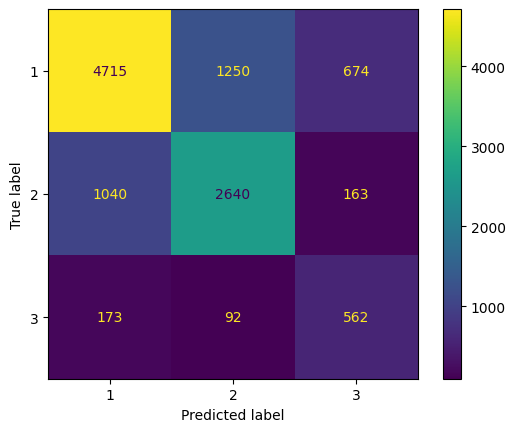

In [35]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Approach 1: Apply Oversampling Before the Split
Oversampling is a technique used to address class imbalance in a dataset, especially when one class is underrepresented compared to others. In the context of morphological galaxy classification, it ensures that each morphological type is adequately represented in the training data, preventing the model from being biased towards the majority class.

Here's a step-by-step explanation of this approach:

In [37]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [38]:
X = data_rfs

In [39]:
# Supongamos que X es tu conjunto de características y y es tu variable objetivo

# Aplica el sobremuestreo al conjunto completo
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [40]:
# Divide los datos en entrenamiento y prueba
X_train, X_test, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [41]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train1)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 47, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 63}


In [42]:
# Entrena el clasificador Random Forest
# clf1 = ensemble.RandomForestClassifier(max_depth= 41, max_features= 'sqrt', min_samples_leaf= 3, min_samples_split= 3, n_estimators= 52)
clf1 = ensemble.RandomForestClassifier(max_depth= 44, max_features= 'sqrt', min_samples_leaf= 3, min_samples_split= 9, n_estimators= 39)
clf1.fit(X_train, y_train1);
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

In [43]:
predictions1 = clf1.predict(X_test)
print(classification_report(y_test1, predictions1))

              precision    recall  f1-score   support

           1       0.84      0.70      0.76      6677
           2       0.81      0.84      0.82      6692
           3       0.89      0.99      0.94      6548

    accuracy                           0.84     19917
   macro avg       0.84      0.85      0.84     19917
weighted avg       0.84      0.84      0.84     19917



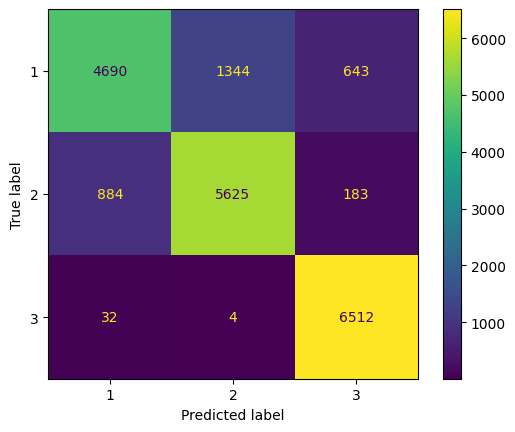

In [44]:
cm1 = confusion_matrix(y_test1, predictions1, labels=clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf.classes_)
disp1.plot()
plt.show()

## Approach 2: Apply oversampling after the split.








I am going to use the 'stratify' option again, and set class_weight='balanced'.

In [45]:
X_train1, X_test1, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [67]:
#This Applies Oversampling Only to the Training Set
# oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train1, y_train2)


In [47]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 157}


In [48]:
# clf = RandomForestClassifier()
# clf2 = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 4, n_estimators= 42)
# class_weight='balanced'
clf2 = ensemble.RandomForestClassifier(max_depth= 24, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 110, class_weight='balanced')
clf2.fit(X_train_resampled, y_train_resampled);
# clf.fit(X_train_resampled, y_train_resampled)

In [49]:
predictions2 = clf2.predict(X_test1)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           1       0.78      0.76      0.77      6639
           2       0.68      0.66      0.67      3843
           3       0.45      0.57      0.50       827

    accuracy                           0.71     11309
   macro avg       0.63      0.66      0.65     11309
weighted avg       0.72      0.71      0.71     11309



In [50]:
# Evaluation Metrics
accuracy = clf.score(X_test1, y_test2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8272172605889115


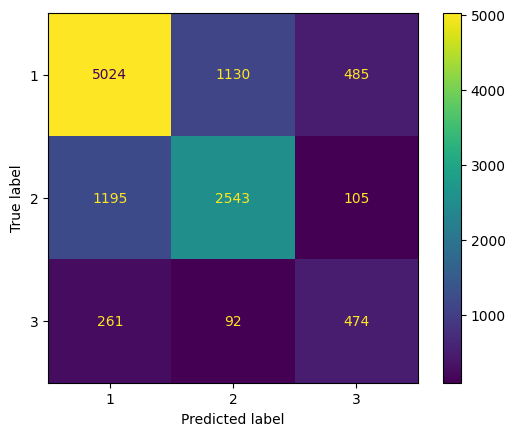

In [51]:
cm2 = confusion_matrix(y_test2, predictions2, labels=clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf.classes_)
disp2.plot()
plt.show()

##### SMOTE

In [53]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled1, y_resampled1 = smote.fit_resample(X, y)

In [54]:
X_train2, X_test2, y_train3, y_test3 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

In [55]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train2, y_train3)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 29, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 177}


In [56]:
clf3 = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 8, n_estimators= 146, class_weight='balanced')
clf3.fit(X_train2, y_train3);

In [57]:
predictions3 = clf3.predict(X_test2)
print(classification_report(y_test3, predictions3))

              precision    recall  f1-score   support

           1       0.77      0.66      0.71      6677
           2       0.78      0.79      0.79      6692
           3       0.84      0.95      0.89      6548

    accuracy                           0.80     19917
   macro avg       0.80      0.80      0.80     19917
weighted avg       0.80      0.80      0.80     19917



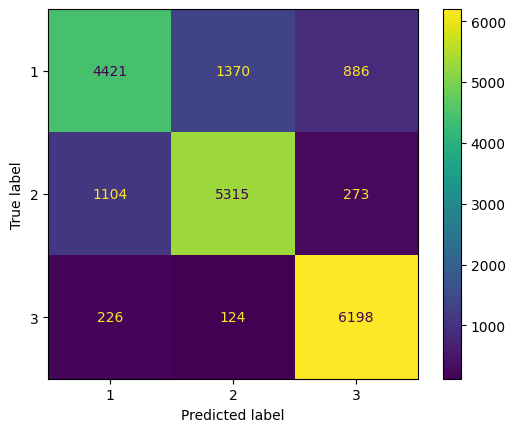

In [58]:
cm3 = confusion_matrix(y_test3, predictions3, labels=clf.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf.classes_)
disp3.plot()
plt.show()

In [60]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled2, y_resampled2 = undersampler.fit_resample(X_train, y_train)

In [61]:
X_train3, X_test3, y_train4, y_test4 = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

In [62]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train3, y_train4)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 33, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 189}


In [63]:
clf4 = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'log2', min_samples_leaf= 9, min_samples_split= 8, n_estimators= 57, class_weight='balanced')
clf4.fit(X_train3, y_train4);

In [64]:
predictions4 = clf4.predict(X_test3)
print(classification_report(y_test4, predictions4))

              precision    recall  f1-score   support

           1       0.34      0.34      0.34       674
           2       0.30      0.28      0.29       660
           3       0.31      0.32      0.31       652

    accuracy                           0.31      1986
   macro avg       0.31      0.31      0.31      1986
weighted avg       0.31      0.31      0.31      1986



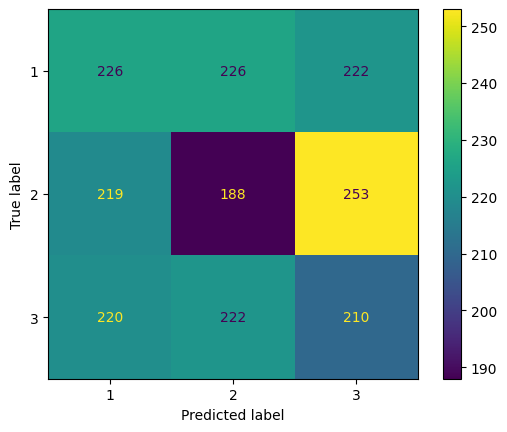

In [65]:
cm4 = confusion_matrix(y_test4, predictions4, labels=clf.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=clf.classes_)
disp4.plot()
plt.show()

In [66]:
RandomForestClassifier?

# Neural Networks

## keras Implementation

Due to the heavy size of the images and the prolonged download times, the remaining part of this notebook will focus on implementing a neural network using Keras (and PyTorch in the near future) with a limited number of images. Consequently, the resulting model may not exhibit optimal performance. Achieving a high-quality model would necessitate significant computational power. In the near future, I plan to implement cross-validation using PyTorch for enhanced model evaluation.

In [88]:
import astropy.units as u
from astroquery.skyview import SkyView
import matplotlib.patches as mpatches
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm

In [89]:
dataset=pd.read_csv('curated_galaxies')
display(dataset.head(2))
display(dataset.shape)

Unnamed: 0                  objID          ra        dec  modelMag_u  \
0           0  1,23765119242489E+018  116.519097  39.886407    0.396231   
1           1  1,23765149575578E+018  116.451900  41.421270    0.447561   

   modelMag_g  modelMag_r  modelMag_i  modelMag_z  petroR90_r         z  \
0    0.417569    0.448185    0.416475    0.450813    0.309874  0.717351   
1    0.354289    0.326150    0.290167    0.299840    0.365343  0.673681   

      Color  elliptical  spiral  uncertain clase  
0  0.648141           0       1          0     S  
1  0.375909           0       0          1     I

(56545, 16)

In [90]:
from sklearn.model_selection import train_test_split
X = dataset.drop([ "clase", "uncertain", "spiral", "elliptical"], axis=1)
y = dataset["clase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=545)


In [91]:
df_elliptical = dataset[dataset["elliptical"] == 1]
df_spiral = dataset[dataset["spiral"] == 1]
df_uncertain =dataset[dataset["uncertain"] == 1]

In [92]:
coords_gx = SkyCoord(df_spiral.ra.iloc[20], df_spiral.dec.iloc[20], unit=(u.deg,u.deg))
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi','SDSSr','SDSSu', 'SDSSz'])

In [93]:
color_maps = {
    'SDSS-g': 'Blues',
    'SDSS-u': 'Greens',
    'SDSS-r': 'Reds',
    'SDSS-i': 'Oranges',
    'SDSS-z': 'Purples'
}


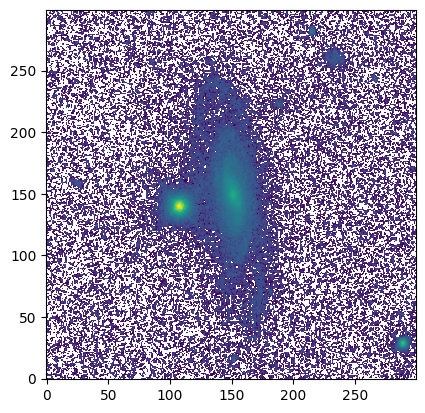

In [94]:
plt.imshow(img[0][0].data, cmap=color_maps.get('SDSSg'), norm=LogNorm(),origin='lower')

SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


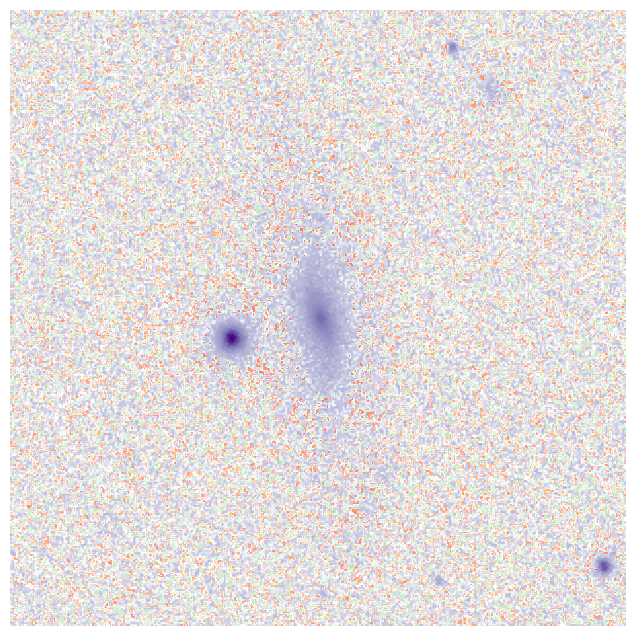

In [95]:
#### Quality control
initial = 0
for i in range(len(img)):
    band = img[i][0].header['SURVEY'].strip()
    print(band)
    cmap = color_maps.get(band, 'Blues')
    plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(), origin='lower')
    plt.axis('off')
    plt.gca().set_frame_on(False)
    plt.gcf().set_size_inches(8, 8)

In [18]:
plt.savefig(f'images/elliptical{initial}-band{band}.jpg', format='jpg', bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>

In [96]:
from astropy.coordinates import SkyCoord

>>> successfull downloading image 1
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 2
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 3
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 4
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 5
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 6
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 7
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


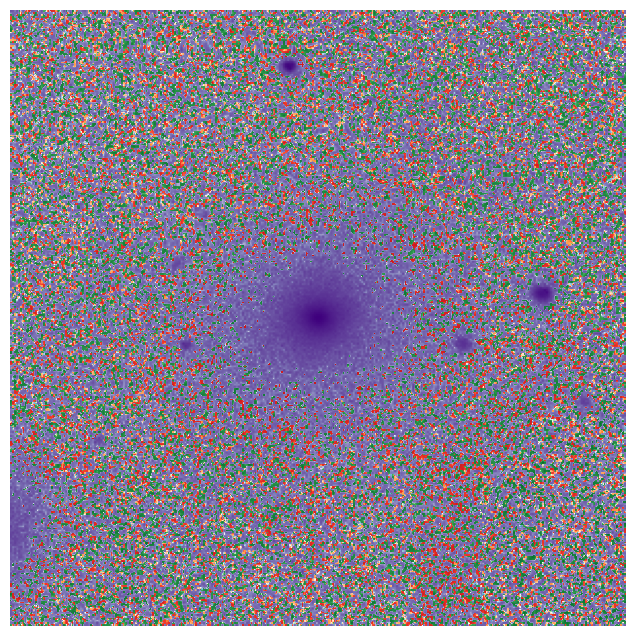

In [24]:
split = np.array_split(df_elipticas, 10)
df_temp = df_elipticas.index.drop_duplicates(keep='first')
images_elipticas = {}
initial = 0
for index, row in df_elipticas[200:].iterrows():
    if (initial < 20):
        try:
            coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
            img = SkyView.get_images(position=coords_gx, survey=['SDSSg'
            ,'SDSSi','SDSSr', 'SDSSu', 'SDSSz'])
            initial += 1
            if initial>7:
                break
            print(f">>> successfull downloading image {initial}")
            for i in range(len(img)):
                band = img[i][0].header['SURVEY'].strip()
                print(band)
                cmap = color_maps.get(band, 'Blues')
                plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(), origin='lower')
                plt.axis('off')
                plt.gca().set_frame_on(False)
                plt.gcf().set_size_inches(8, 8)
                plt.savefig(f'elipticas{initial}-band{band}.jpg', format='jpg',bbox_inches='tight', pad_inches=0)
        except:
            continue

>>> successfull downloading image 1
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 2
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 3
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 4
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 5
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 6
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 7
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


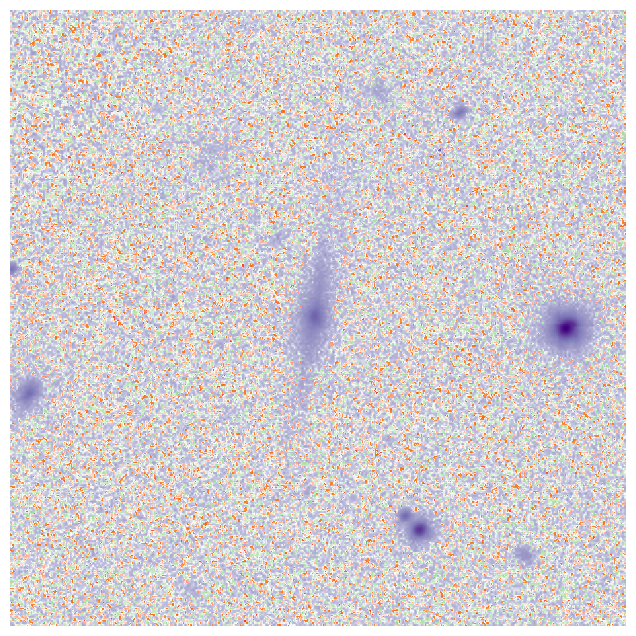

In [25]:
split = np.array_split(df_spiral, 10)
df_temp = df_spiral.index.drop_duplicates(keep='first')
images_spiral = {}
initial = 0
for index, row in df_spiral[200:].iterrows():
    if (initial < 20):
        try:
            coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
            img = SkyView.get_images(position=coords_gx, survey=['SDSSg',
            'SDSSi','SDSSr', 'SDSSu', 'SDSSz'])
            initial += 1
            if initial>7:
                break
            print(f">>> successfull downloading image {initial}")
            for i in range(len(img)):
                band = img[i][0].header['SURVEY'].strip()
                print(band)
                cmap = color_maps.get(band, 'Blues')
                plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(),
                origin='lower')
                plt.axis('off')
                plt.gca().set_frame_on(False)
                plt.gcf().set_size_inches(8, 8)
                plt.savefig(f'espirales{initial}-band{band}.jpg', format='jpg',
                bbox_inches='tight', pad_inches=0)
        except:
            continue

>>> successfull downloading image 1
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 2
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 3
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 4
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 5
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 6
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z
>>> successfull downloading image 7
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


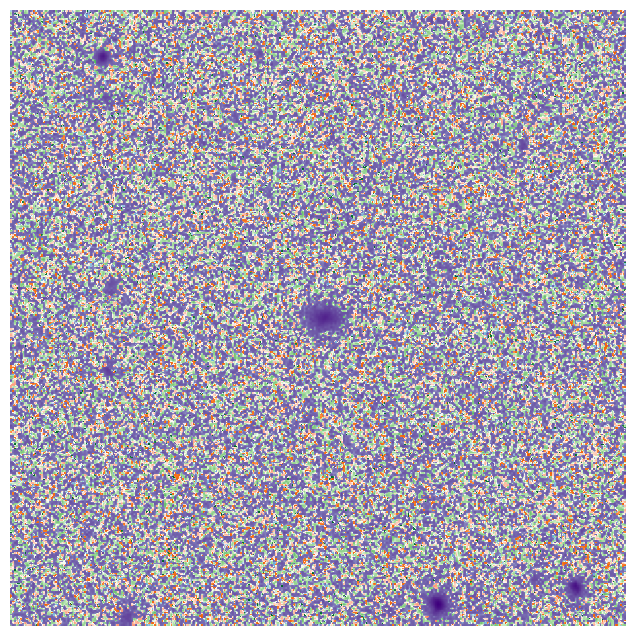

In [26]:
split = np.array_split(df_uncertain, 10)
df_temp = df_uncertain.index.drop_duplicates(keep='first')
images_uncertain = {}
initial = 0
for index, row in df_uncertain[200:].iterrows():
    if (initial < 20):
        try:
            coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
            img = SkyView.get_images(position=coords_gx, survey=['SDSSg',
            'SDSSi','SDSSr', 'SDSSu', 'SDSSz'])
            initial += 1
            if initial>7:
                break
            print(f">>> successfull downloading image {initial}")
            for i in range(len(img)):
                band = img[i][0].header['SURVEY'].strip()
                print(band)
                cmap = color_maps.get(band, 'Blues')
                plt.imshow(img[i][0].data, cmap=cmap, norm=LogNorm(),
                origin='lower')
                plt.axis('off')
                plt.gca().set_frame_on(False)
                plt.gcf().set_size_inches(8, 8)
                plt.savefig(f'irregulares{initial}-band{band}.jpg', format='jpg',
                bbox_inches='tight', pad_inches=0)
        except:
            continue

In [97]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, Input, concatenate
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from tensorflow.keras.models import Model
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

#### Now you must create two folders (inside the repository) called 'images' and 'images_test'

In [98]:
data_dir = "images"

In [99]:
morfologies = ['elipticas', 'espirales', 'irregulares']
filters = ['SDSS-g', 'SDSS-i', 'SDSS-r', 'SDSS-u', 'SDSS-z']
num_samples = 16
combined_images = []
labels = []
for morphology in morfologies:
    combined_morphology_images = []
    for i in range(1, num_samples + 1):
        band_images = []
        labels.append(morphology)
        for filter_name in filters:
            
            image_path = (f'{data_dir}/{morphology}{i}-band{filter_name}.jpg')
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (300, 300))
            band_images.append(image)
            
               
            
        combined_morphology_images.append(np.stack(band_images, axis=-1))
        
    combined_images.extend(combined_morphology_images)

In [100]:
combined_images = np.array(combined_images)
combined_images.shape

(48, 300, 300, 5)

In [101]:
label_encoding = []
for label in labels:
    if label == "elipticas":
        label_encoding.append(0)
    if label == "espirales":
        label_encoding.append(1)
    if label == "irregulares":
        label_encoding.append(2)

In [102]:
train_labels = np.array(label_encoding)

In [103]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_onehot = to_categorical(train_labels_encoded)

In [104]:
model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(300, 300, 5)))
model.add(MaxPooling2D((5, 5)))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(3))

In [105]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [106]:
model.fit(combined_images, train_labels_onehot, epochs=10, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 9s 3s/step - loss: 6.3042 - accuracy: 0.3256 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 8s 3s/step - loss: 10.1207 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 8s 2s/step - loss: 9.4838 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 10s 2s/step - loss: 4.7720 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 8s 2s/step - loss: 4.6455 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 10s 2s/step - loss: 4.5939 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 10s 2s/step - loss: 4.5589 - accuracy: 0.3721 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Ep

In [107]:
model.save('modelo.h5')

In [108]:
test_dir = "images_test"

In [109]:
morfologies = ['elipticas', 'espirales', 'irregulares']
filters = ['SDSS-g', 'SDSS-i', 'SDSS-r', 'SDSS-u', 'SDSS-z']
num_samples = 8
combined_images_test = []
labels_test = []
j = 15
for morphology in morfologies:
    combined_morphology_images = []
    j=15
    for i in range(1, num_samples):
        band_images_test = []
        labels_test.append(morphology)
        for filter_name in filters:
#print(f'{morphology}/{morphology}{j}-band{filter_name}.jpg')
            image_path_test = (f'{test_dir}/{morphology}{i}-band{filter_name}.jpg')
            image_test = cv2.imread(image_path_test, cv2.IMREAD_GRAYSCALE)
            image_test = cv2.resize(image_test, (300, 300))
            band_images_test.append(image_test)
        j +=1
        combined_morphology_images.append(np.stack(band_images_test, axis=-1))
                                           
    combined_images_test.extend(combined_morphology_images)

In [110]:
combined_images_test = np.array(combined_images_test)
combined_images_test.shape

(21, 300, 300, 5)

In [111]:
label_encoding_test = []
for label in labels_test:
    if label == "elipticas":
        label_encoding_test.append(0)
    if label == "espirales":
        label_encoding_test.append(1)
    if label == "irregulares":
        label_encoding_test.append(2)

In [112]:
test_labels = np.array(label_encoding_test)

In [113]:
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_onehot = to_categorical(test_labels_encoded)


In [114]:
loaded_model = load_model('modelo.h5')

In [115]:
predictions = loaded_model.predict(combined_images_test)

1/1 [==============================] - 1s 1s/step


In [116]:
predicted_labels = predictions.argmax(axis=1)

In [117]:
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Precision: {accuracy:.2f}')

Precision: 0.33


In [118]:
classification_rep = classification_report(test_labels, predicted_labels,target_names=morfologies)
print('Classification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

   elipticas       0.00      0.00      0.00         7
   espirales       0.33      1.00      0.50         7
 irregulares       0.00      0.00      0.00         7

    accuracy                           0.33        21
   macro avg       0.11      0.33      0.17        21
weighted avg       0.11      0.33      0.17        21



C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)